In [1]:
import cv2
from PIL import Image               # to load images
from IPython.display import display # to display images
import keras
from keras import layers
import numpy as np
from numpy import asarray

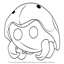

AttributeError: 'Image' object has no attribute 'shape'

In [2]:

abra = Image.open('dataset/Kabuto/ca9d222caae34ad49cd7ad64e26cbfde.jpg')
abra = abra.resize((64,64))
display(abra)
# abra.shape

In [3]:
latent_dim=64
height=64
width=64
channels=3

In [4]:
generator_input=keras.Input(shape=(latent_dim,))
x = layers.Dense(128*32*32)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((32,32,128))(x)

x = layers.Conv2D(256, 5, padding = 'same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides = 2, padding = 'same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding = 'same')(x)
x = layers.LeakyReLU()(x)
# x = layers.Conv2D(256, 5, padding = 'same')(x)
# x = layers.LeakyReLU()(x)
# x = layers.Dropout(0.4)(x)
x = layers.Conv2D(channels, 7, activation = 'tanh', padding= 'same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 131072)            8519680   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 131072)            0         
_________________________________________________________________
reshape (Reshape)            (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 64, 64, 256)       104883

In [16]:
discriminator_input = keras.Input(shape=(height,width,channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides = 2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides = 2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides = 2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

discrimnator = keras.models.Model(discriminator_input, x)
discrimnator.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 128)       262272    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 128)       0   

In [17]:
discriminator_optimizer = keras.optimizers.RMSprop(learning_rate= 0.0008, clipvalue= 1, decay = 1e-8)

In [18]:
discrimnator.compile(optimizer= discriminator_optimizer, loss='binary_crossentropy')

In [27]:
discrimnator.trainable = False
gan_input = keras.Input(shape= (latent_dim,))
gan_output = discrimnator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)
gan.summary()
gan_optimzer = keras.optimizers.RMSprop(learning_rate= 0.0004, clipvalue= 1, decay= 1e-8)
gan.compile(optimizer= gan_optimzer, loss = 'binary_crossentropy')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
model (Functional)           (None, 64, 64, 3)         12064259  
_________________________________________________________________
model_3 (Functional)         (None, 1)                 795009    
Total params: 12,859,268
Trainable params: 12,064,259
Non-trainable params: 795,009
_________________________________________________________________


In [9]:
import os
from keras_preprocessing import image

In [21]:
x = np.zeros((9897, 64, 64, 3))
# x[0] =abra
# x[0]

In [22]:
i=0
for f in os.listdir('dataset'):
    for p in os.listdir('dataset/' + f):
        if not p.endswith('svg'):
            a = Image.open('dataset/' + f + '/' + p)
            try:
                a = a.resize((64,64))
                a = asarray(a)
                # print(a.shape)
                x[i] = a
                i+=1
            except Exception as e:
                print(str(f + " " + p))
# x = np.array(x) 

Kabuto ca9d222caae34ad49cd7ad64e26cbfde.jpg
Kabuto 1d8c4ffee6fa43cf9d3bdd715b756538.jpg
Grimer 09c63b017432480d9c9d63ed44f4c9df.jpg
Grimer e30256b4699446b7b9b242d42375b90a.jpg
Grimer a068c41c8b8b46138205072bf6addf76.jpg
Grimer ae13043a24694328b18a404317455fd8.jpg
Ekans 8a72fbccb86d452bb1f9b32678b0df36.jpg
Ekans e7ffbad6f4b84beda3d43acbccd3bf03.jpg
Ekans 23874395cee7470f9934900f49acae8f.jpg
Jigglypuff 0c2aba3dd3074b19892e3b45146f33a6.jpg
Jigglypuff 8e76c2d4765b45a1a93a3baf27d21dc0.jpg
Gastly ea9ad5fd283a4c3586ea70fed9b8ce1c.jpg
Seadra 4609351fd6c145238e46733a005064e1.jpg
Seadra ab014e620783468c8e207667edddea5f.jpg
Seadra a9e0e66523a5477fb8cb58b57d89af24.jpg
Seadra 08bfba70b982473195c16ee62900709b.jpg
Hypno bbdaec0b719a4687bec963aabf39ef36.jpg
Hypno ecf8bc21150a47509304e80e1ea8d4fa.jpg
Hypno f0c24f31e8064c5dabf11e92918f3c82.jpg
Weepinbell 463697e930444306a358a3d9f77eeb36.jpg
Weepinbell 135f57b9aa9c40e7846698637f7f4e33.jpg
Weepinbell 3021a25efbb8401db316a6e773199c43.jpg
Weepinbell 37d347a

In [23]:
x.shape

(9897, 64, 64, 3)

In [24]:
x = x.reshape((x.shape[0],) + (height, width, channels)).astype('float32')/255

In [14]:
iterations = 10000
batch_size = 32
output_dir = 'output_dir'

In [26]:
start = 0
for step in range(iterations):
    latent_vectors = np.random.normal(size = (batch_size, latent_dim))
    generated_images = generator.predict(latent_vectors)
    end = start +batch_size
    real_images = x[start:end]
    # print(generated_images.shape)
    combined_images = np.concatenate([generated_images, real_images])
    y = np.concatenate([np.zeros((batch_size,1)), np.ones((batch_size, 1))])
    # y += 0.05 * np.random.random(y.shape)

    discriminator_loss = discrimnator.train_on_batch(combined_images, y)
    latent_vectors = np.random.normal(size = (batch_size, latent_dim))  
    y_gan = np.zeros((batch_size,1))

    gan_loss = gan.train_on_batch(latent_vectors, y_gan)

    start +=batch_size
    if start > len(x) - batch_size:
        start =0

    if step%10 ==0:
        gan.save_weights('gan.h5')

        print('discriminator_loss: ', discriminator_loss)
        print('gan_loss: ', gan_loss)

        img = image.array_to_img(generated_images[0]*255, scale= False)
        img.save(os.path.join(output_dir, str(step) +'.png'))




discriminator_loss:  -8570156.0
gan_loss:  0.0
discriminator_loss:  -14636954.0
gan_loss:  0.0
discriminator_loss:  -20527292.0
gan_loss:  0.0


KeyboardInterrupt: 